In [28]:
from util_cleaning import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

In [29]:
df = pd.read_csv(DATABASE_PATH + 'cleaned_data/final_1d.csv',sep = ';')


In [30]:
df = df.iloc[:,1:]

In [31]:
df

,power_consummption,temperature,humidity,visibility,nebulosity
0,1.909031,0.495543,0.640371,0.592368,0.173077
1,1.245669,0.381280,0.716937,0.588031,0.250000
2,0.359419,0.375203,0.830626,0.496964,0.653846
3,1.814479,0.467990,0.714617,0.644406,0.586538
4,1.124064,0.489060,0.777262,0.566349,0.307692
...,...,...,...,...,...
1091,1.462753,0.307536,0.744780,0.667823,0.182692
1092,1.439099,0.269044,0.925754,0.423244,0.346154
1093,1.376526,0.446515,0.925754,0.324371,0.326923
1094,1.516055,0.494733,0.877030,0.423244,0.326923


# Choose K

In [6]:
scaler = MinMaxScaler()

In [32]:
# df_to_scale = df.iloc[:,[0,1,2]]
# df_to_scale = df_to_scale.dropna(how =  'any')
# df_to_scale
df_to_scale = df.copy()

In [33]:
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled

array([[0.72332732, 0.49554295, 0.64037123, 0.59236774, 0.17307692],
       [0.44680342, 0.38128039, 0.71693735, 0.58803122, 0.25      ],
       [0.07736837, 0.37520259, 0.83062645, 0.49696444, 0.65384615],
       ...,
       [0.50135173, 0.4465154 , 0.92575406, 0.32437121, 0.32692308],
       [0.55951449, 0.49473258, 0.87703016, 0.42324371, 0.32692308],
       [0.56501984, 0.35534846, 0.95591647, 0.24978317, 0.34615385]])

## 1. Elbow Curve

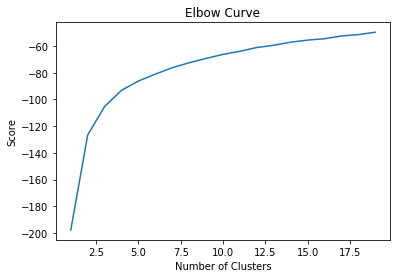

In [34]:
# optimum K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 2. Silhouette_score

In [35]:
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
# TO_DO: give a nice picture

For n_clusters = 2, silhouette score is 0.29578377094343866)
For n_clusters = 3, silhouette score is 0.22803061006914552)
For n_clusters = 4, silhouette score is 0.2146291476222628)
For n_clusters = 5, silhouette score is 0.17799717368970241)
For n_clusters = 6, silhouette score is 0.17028221483306097)
For n_clusters = 7, silhouette score is 0.17299523455670643)
For n_clusters = 8, silhouette score is 0.17133953918901054)
For n_clusters = 9, silhouette score is 0.1693803981513533)
For n_clusters = 10, silhouette score is 0.17086968216211348)
For n_clusters = 11, silhouette score is 0.16389106400901)
For n_clusters = 12, silhouette score is 0.16063317374393887)
For n_clusters = 13, silhouette score is 0.1616747587608694)
For n_clusters = 14, silhouette score is 0.16700211150839336)
For n_clusters = 15, silhouette score is 0.16916806421648492)
For n_clusters = 16, silhouette score is 0.1624957307012332)
For n_clusters = 17, silhouette score is 0.16658241962481168)
For n_clusters = 18, si

# Test for Kmeans

In [36]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(df_scaled)
df_to_scale['weather_cluster'] = kmeans.labels_
df_to_scale

,power_consummption,temperature,humidity,visibility,nebulosity,weather_cluster
0,1.909031,0.495543,0.640371,0.592368,0.173077,1
1,1.245669,0.381280,0.716937,0.588031,0.250000,1
2,0.359419,0.375203,0.830626,0.496964,0.653846,1
3,1.814479,0.467990,0.714617,0.644406,0.586538,1
4,1.124064,0.489060,0.777262,0.566349,0.307692,1
...,...,...,...,...,...,...
1091,1.462753,0.307536,0.744780,0.667823,0.182692,1
1092,1.439099,0.269044,0.925754,0.423244,0.346154,1
1093,1.376526,0.446515,0.925754,0.324371,0.326923,1
1094,1.516055,0.494733,0.877030,0.423244,0.326923,1


In [37]:
df_scaled

array([[0.72332732, 0.49554295, 0.64037123, 0.59236774, 0.17307692],
       [0.44680342, 0.38128039, 0.71693735, 0.58803122, 0.25      ],
       [0.07736837, 0.37520259, 0.83062645, 0.49696444, 0.65384615],
       ...,
       [0.50135173, 0.4465154 , 0.92575406, 0.32437121, 0.32692308],
       [0.55951449, 0.49473258, 0.87703016, 0.42324371, 0.32692308],
       [0.56501984, 0.35534846, 0.95591647, 0.24978317, 0.34615385]])

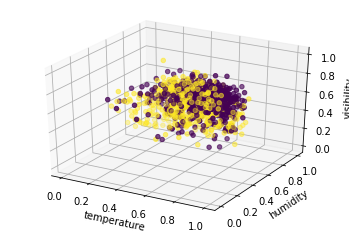

In [47]:
plot_3d(df_to_scale,1,2,3,title = 'combine')

In [48]:
df_to_scale

,power_consummption,temperature,humidity,visibility,nebulosity,weather_cluster
0,1.909031,0.495543,0.640371,0.592368,0.173077,1
1,1.245669,0.381280,0.716937,0.588031,0.250000,1
2,0.359419,0.375203,0.830626,0.496964,0.653846,1
3,1.814479,0.467990,0.714617,0.644406,0.586538,1
4,1.124064,0.489060,0.777262,0.566349,0.307692,1
...,...,...,...,...,...,...
1091,1.462753,0.307536,0.744780,0.667823,0.182692,1
1092,1.439099,0.269044,0.925754,0.423244,0.346154,1
1093,1.376526,0.446515,0.925754,0.324371,0.326923,1
1094,1.516055,0.494733,0.877030,0.423244,0.326923,1


In [50]:
def plot_clustering(weather_energy,i=0,j=1):
    fig, ax1 = plt.subplots(figsize = (10,7))
    ax1.scatter(weather_energy.iloc[:,i], 
                weather_energy.iloc[:,j], 
#                 s = weather_energy.windSpeed*10,
                c = weather_energy.weather_cluster)
    ax1.set_xlabel(weather_energy.columns[i])
    ax1.set_ylabel(weather_energy.columns[j])
    plt.savefig(DATABASE_PATH + "pictures/"+weather_energy.columns[i][:5] +' vs '+ weather_energy.columns[j][:5]+"combine_kmeans.png")
    plt.show()

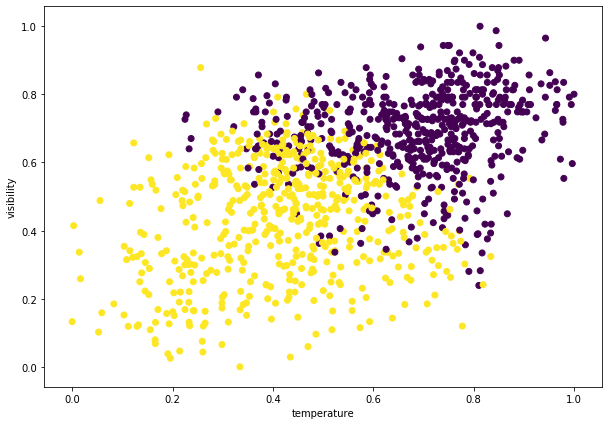

In [53]:
plot_clustering(df_to_scale,1,3)